In [12]:
import tensorflow 

In [13]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

Autoencoder

In [14]:
SIZE=256
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 8)        

# Original Image

In [17]:
np.random.seed(42)

SIZE=256
img_data=[]

img=cv2.imread('michaelscott.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

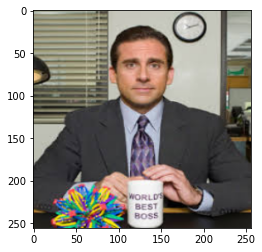

In [21]:
imshow(img)

In [18]:
model.fit(img_array, img_array,
        epochs=5000,
        shuffle=True)


Epoch 1/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4655
Epoch 2/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2359 - accuracy: 0.4655
Epoch 3/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2185 - accuracy: 0.4656
Epoch 4/5000
1/1 [==============================] - 0s 997us/step - loss: 0.1994 - accuracy: 0.4657
Epoch 5/5000
1/1 [==============================] - 0s 997us/step - loss: 0.1823 - accuracy: 0.4657
Epoch 6/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1762 - accuracy: 0.4657
Epoch 7/5000
1/1 [==============================] - 0s 997us/step - loss: 0.1897 - accuracy: 0.4657
Epoch 8/5000
1/1 [==============================] - 0s 999us/step - loss: 0.1914 - accuracy: 0.4657
Epoch 9/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1836 - accuracy: 0.4657
Epoch 10/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1771 - accuracy: 0.4657
Epoc

print("Output")
pred = model.predict(img_array)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


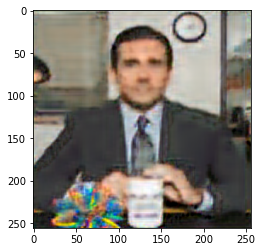

In [23]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")